In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [5]:
data = pd.read_csv('advertising.csv')
print(data.head())
# Check for missing values
print(data.isnull().sum())
# Get a summary of the dataset
print(data.describe())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


In [4]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 2.907756910271091
R-squared: 0.9059011844150826


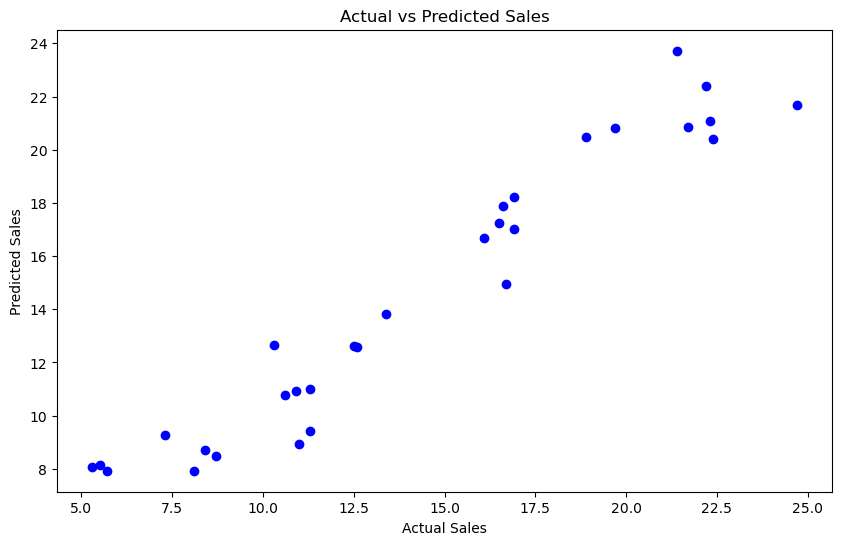

In [8]:
# Example: Visualize predictions vs actual sales for the first few test samples
plt.figure(figsize=(10, 6))
plt.scatter(y_test.head(30), y_pred[:30], color='blue')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

In [9]:
# Print the coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

           Coefficient
TV            0.054509
Radio         0.100945
Newspaper     0.004337
